In [17]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from math import cos, pi
import IPython
from Levinson_Durbin import levinson 

In [ ]:
def error(coef, segment):
    e = np.zeros(256, 1)
    n = 256
    
    for i in range(n+1):
        e[i] = segment[i]
        for j in range(1, 11):
            if i - j > 0:
                e[i] = e[i] + coef[j] * segment(i-j)
    
    return e

In [2]:
def LD_algorithm(segment):
    n = 256
    p = np.zeros((11,1))
    for i in range(0,11):
        for t in range(i+1,n):
            p[i] += segment[t] * segment[t - i]

    a = np.zeros((10,10))

    sigma = np.zeros(11)
    sigma[0] = p[0]

    k = np.zeros(10)
    k[0] = p[1] / p[0]

    a[0,0] = k[0]
    sigma[1] = (1 - k[0]**2) * sigma[0]

    for i in range(1,10):
        x = 0

        for j in range(1,i):
            x += a[j-1, i-1] * p[i - j]

        k[i] = (p[i + 1] - x) / sigma[i]
        a[i,i] = k[i]

        for j in range(1,i):
            a[j-1,i] = a[j-1, i - 1] - k[i] * a[i - j - 1, i - 1]

        sigma[i + 1] = (1 - k[i]**2) * sigma[i]

    return k, p


In [2]:
# Weight for flattening edges
def weight(i: int):
    return 0.5*(1-cos(((2*pi) / (257)) * i))

In [3]:
# Check if last 10 smaples from previous segment
# fir first 10 samples from current segment
def check_samples(segments: np.ndarray):
    for i in range(1,len(segments)):
        if list(segments[i-1][-10:]) != list(segments[i][:10]):
            print('\033[91m' + "X Test 1 Failed")
            print(f"List #{i-1} is diff with list #{i}")
    print('\033[92m' + f"\u2713 Test Passed")

In [14]:
def play_sound(sound, rate=11025):
    sf.write("data/test.wav", sound, rate)
    return  IPython.display.display(IPython.display.Audio(sound, rate=rate))

In [15]:
# Read wave file
track, fs = sf.read("data/01.wav")

In [16]:
play_sound(track[:256])

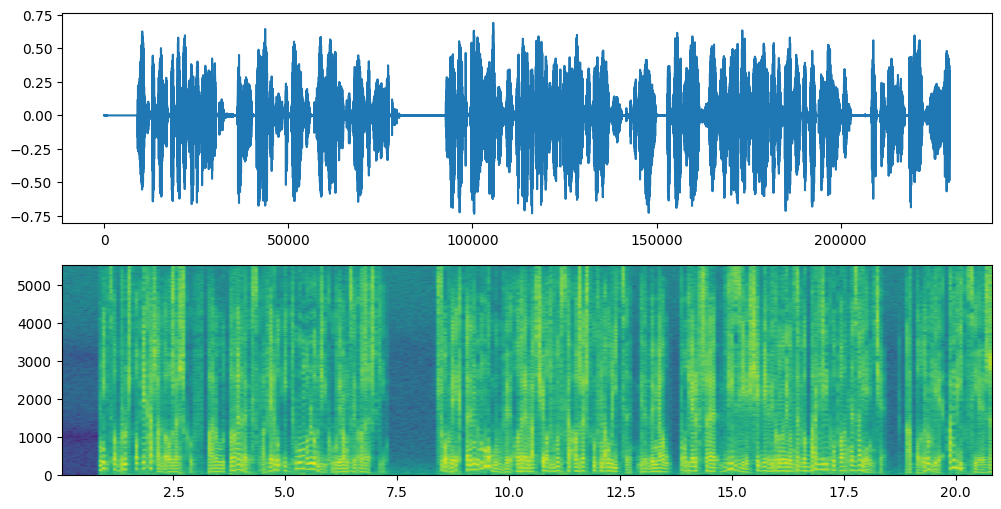

In [5]:
# Ploting track with specgram
plt.figure(figsize=(12,6))

plt.subplot(2, 1, 1)
plt.plot(track)

plt.subplot(2, 1, 2)
plt.specgram(track, NFFT=1024, Fs=fs)

plt.show()

In [6]:
# Creating segments with 256 samples 
segments_clear = [track[:256]]

for i in range(256, len(track), 256):
    segments_clear.append(track[i-10:i+256])

# Adding 0 to fit 256
last_seg_len = (len(segments_clear[-1]) - 256) * -1
if last_seg_len > 0:
    segments_clear[-1] = np.append(segments_clear[-1], [0]*last_seg_len)

In [7]:
# Check if last 10 samples from previus segment
# fit first 10 samples from current segment
check_samples(segments_clear)

✓ Test Passed


In [8]:
segments_model = []

for idx, lst in enumerate(segments_clear):
    lst[0] = weight(1)
    lst[-1] = weight(256)
    segments_model.append(np.zeros(10))
    segments_model[idx] = np.append(segments_model[idx], lst)
    segments_model[idx] = np.append(segments_model[idx], np.zeros(10))


In [9]:
# Check if zeros added to segments
check_samples(segments_model)

✓ Test Passed
